In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
data=pd.read_csv('houzz_data_challenge_newsletters.csv',low_memory=False)

In [3]:
# Overview the data
data.head()

,ts,nl_id,user_id,dt,hr,event_type,event_type_param
0,1461110419,2853,4551,4/19/16,17,nlsent,0
1,1461715220,2885,4551,4/26/16,17,nlsent,0
2,1461456022,2873,4551,4/23/16,17,nlsent,0
3,1461110419,2853,6159,4/19/16,17,nlsent,0
4,1461715220,2885,6159,4/26/16,17,nlsent,0


In [4]:
# Overview type of data and basic info about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164071 entries, 0 to 164070
Data columns (total 7 columns):
ts                  164071 non-null int64
nl_id               164071 non-null int64
user_id             164071 non-null int64
dt                  164071 non-null object
hr                  164071 non-null int64
event_type          164071 non-null object
event_type_param    164071 non-null object
dtypes: int64(4), object(3)
memory usage: 8.8+ MB


### Question_1

In [10]:
# Count the number of newsletters sent vs opended 

data.groupby(['event_type','nl_id'])['nl_id'].count()

event_type  nl_id
nllc        2853         1
            2873      2141
            2885      1486
            2912       713
nlpv        2853      9019
            2873     11034
            2885      9401
            2912      3100
nlsent      2853     31401
            2873     31674
            2885     31902
            2912     32199
Name: nl_id, dtype: int64

For id=2885, there were 31902 letters sent, and among them 9401 were opened.

For id=2912, there were 32199 letters sent, and among them 3100 were opened.

In [12]:
# Compute the open rate by counting the unique user_id corresponding to
# each nl_id and event_type pair

data.groupby(['nl_id','event_type'])['user_id'].nunique()

nl_id  event_type
2853   nllc              1
       nlpv           6171
       nlsent        31401
2873   nllc           1433
       nlpv           6532
       nlsent        31674
2885   nllc            939
       nlpv           5940
       nlsent        31902
2912   nllc            498
       nlpv           2228
       nlsent        32199
Name: user_id, dtype: int64

In [13]:
open_rate_2885=5940/31902
print('Open rate for nl_id=2885 is {}'.format(open_rate_2885))
open_rate_2912=2228/32199
print('Open rate for nl_id=2885 is {}'.format(open_rate_2912))

Open rate for nl_id=2885 is 0.1861952228700395
Open rate for nl_id=2885 is 0.0691946954874375


### Question_2

For newsletter 2853. Note: subsequent newsletter will be analized in a similar way.

In [143]:
# Isolate data relevant to target newsletter

nl_2853=data[data.nl_id==2853]
nl_2853.dt=pd.to_datetime(nl_2853['dt'])

C:\Users\caesarliu\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [144]:
num_user_2853=nl_2853.user_id.nunique()

In [145]:
num_user_2853 # Number of unique users for letter 2853

31403

In [146]:
ID=(nl_2853[nl_2853.event_type=='nlpv'])['user_id'].unique()# Users who actually viewed the email

In [147]:
# Compute the percentage
Count=np.zeros((1,7))

for i in ID:
    L=nl_2853[nl_2853['user_id']==i]
    time_sent=(L[L.event_type=='nlsent']).dt
    if len(time_sent)==0:
        continue
    time_view=(L[L.event_type=='nlpv']).dt
    T=min(time_view)-min(time_sent)
    T=T/np.timedelta64(1,'D')
    if T>=0 and T<=1:
        Count=Count+1
    elif T<=2 and T>1:
        Count[:,1:]=Count[:,1:]+1
    elif T<=3 and T>2:
        Count[:,2:]=Count[:,2:]+1
    elif T<=4 and T>3:
        Count[:,3:]=Count[:,3:]+1
    elif T<=5 and T>4:
        Count[:,4:]=Count[:,4:]+1
    elif T<=6 and T>5:
        Count[:,5:]=Count[:,5:]+1
    elif T<=7 and T>6:
        Count[:,6:]=Count[:,6:]+1



In [148]:
Count=Count/num_user_2853

In [149]:
Open=pd.DataFrame({'percent':Count[0,:],'Within_Days':[1,2,3,4,5,6,7]},index=[0,1,2,3,4,5,6])

In [91]:
# Visualize the results

sns.set_style('whitegrid')

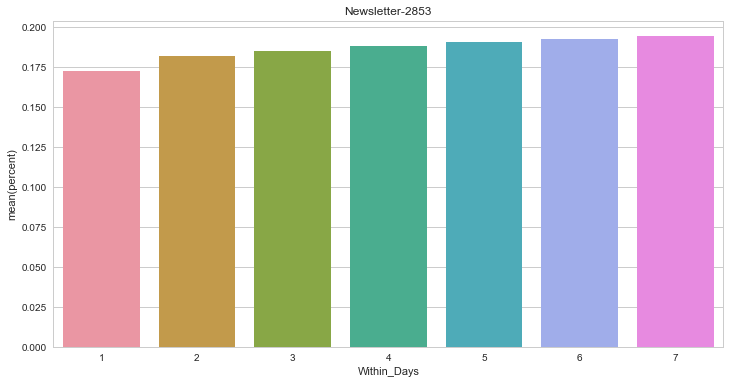

In [150]:

fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Within_Days',y='percent',data=Open)
plt.title('Newsletter-2853')
plt.show()
plt.gcf().clear()

For newsletter 2873

In [141]:
nl_2873=data[data.nl_id==2873]
nl_2873.dt=pd.to_datetime(nl_2873['dt'])
num_user_2873=nl_2873.user_id.nunique()
ID=(nl_2873[nl_2873.event_type=='nlpv'])['user_id'].unique()


Count=np.zeros((1,7))

for i in ID:
    L=nl_2873[nl_2873['user_id']==i]
    time_sent=(L[L.event_type=='nlsent']).dt
    if len(time_sent)==0:
        continue
    time_view=(L[L.event_type=='nlpv']).dt
    T=min(time_view)-min(time_sent)
    T=T/np.timedelta64(1,'D')
    if T>=0 and T<=1:
        Count=Count+1
    elif T<=2 and T>1:
        Count[:,1:]=Count[:,1:]+1
    elif T<=3 and T>2:
        Count[:,2:]=Count[:,2:]+1
    elif T<=4 and T>3:
        Count[:,3:]=Count[:,3:]+1
    elif T<=5 and T>4:
        Count[:,4:]=Count[:,4:]+1
    elif T<=6 and T>5:
        Count[:,5:]=Count[:,5:]+1
    elif T<=7 and T>6:
        Count[:,6:]=Count[:,6:]+1

        
Count=Count/num_user_2873
Open=pd.DataFrame({'percent':Count[0,:],'Within_Days':[1,2,3,4,5,6,7]},index=[0,1,2,3,4,5,6])

C:\Users\caesarliu\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


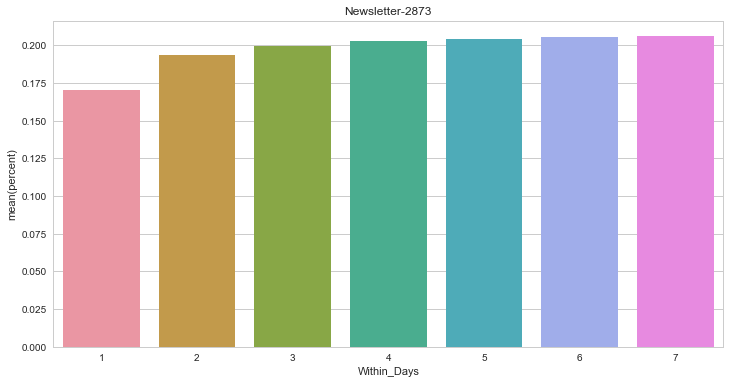

In [142]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Within_Days',y='percent',data=Open)
plt.title('Newsletter-2873')
plt.show()
plt.gcf().clear()

For newsletter 2885

In [139]:
nl_2885=data[data.nl_id==2885]
nl_2885.dt=pd.to_datetime(nl_2885['dt'])
num_user_2885=nl_2885.user_id.nunique()
ID=(nl_2885[nl_2885.event_type=='nlpv'])['user_id'].unique()


Count=np.zeros((1,7))

for i in ID:
    L=nl_2885[nl_2885['user_id']==i]
    time_sent=(L[L.event_type=='nlsent']).dt
    if len(time_sent)==0:
        continue
    time_view=(L[L.event_type=='nlpv']).dt
    T=min(time_view)-min(time_sent)
    T=T/np.timedelta64(1,'D')
    if T>=0 and T<=1:
        Count=Count+1
    elif T<=2 and T>1:
        Count[:,1:]=Count[:,1:]+1
    elif T<=3 and T>2:
        Count[:,2:]=Count[:,2:]+1
    elif T<=4 and T>3:
        Count[:,3:]=Count[:,3:]+1
    elif T<=5 and T>4:
        Count[:,4:]=Count[:,4:]+1
    elif T<=6 and T>5:
        Count[:,5:]=Count[:,5:]+1
    elif T<=7 and T>6:
        Count[:,6:]=Count[:,6:]+1

        
Count=Count/num_user_2885
Open=pd.DataFrame({'percent':Count[0,:],'Within_Days':[1,2,3,4,5,6,7]},index=[0,1,2,3,4,5,6])


C:\Users\caesarliu\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


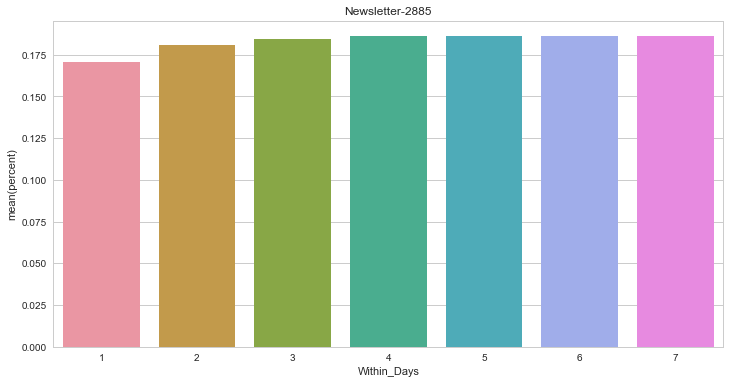

In [140]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Within_Days',y='percent',data=Open)
plt.title('Newsletter-2885')
plt.show()
plt.gcf().clear()

For newsletter 2912

In [135]:
nl_2912=data[data.nl_id==2912]
nl_2912.dt=pd.to_datetime(nl_2912['dt'])
num_user_2912=nl_2912.user_id.nunique()
ID=(nl_2912[nl_2912.event_type=='nlpv'])['user_id'].unique()


Count=np.zeros((1,7))

for i in ID:
    L=nl_2912[nl_2912['user_id']==i]
    time_sent=(L[L.event_type=='nlsent']).dt
    if len(time_sent)==0:
        continue
    time_view=(L[L.event_type=='nlpv']).dt
    T=min(time_view)-min(time_sent)
    T=T/np.timedelta64(1,'D')
    if T>=0 and T<=1:
        Count=Count+1
    elif T<=2 and T>1:
        Count[:,1:]=Count[:,1:]+1
    elif T<=3 and T>2:
        Count[:,2:]=Count[:,2:]+1
    elif T<=4 and T>3:
        Count[:,3:]=Count[:,3:]+1
    elif T<=5 and T>4:
        Count[:,4:]=Count[:,4:]+1
    elif T<=6 and T>5:
        Count[:,5:]=Count[:,5:]+1
    elif T<=7 and T>6:
        Count[:,6:]=Count[:,6:]+1

C:\Users\caesarliu\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [137]:
Count=Count/num_user_2912
Open=pd.DataFrame({'percent':Count[0,:],'Within_Days':[1,2,3,4,5,6,7]},index=[0,1,2,3,4,5,6])

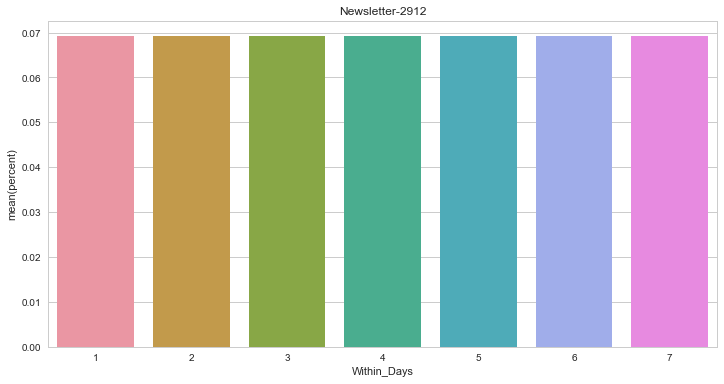

In [138]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Within_Days',y='percent',data=Open)
plt.title('Newsletter-2912')
plt.show()
plt.gcf().clear()

In genearl, letter 2873 seems to have the best open rate

### Question_3

For newsletter 2873

In [167]:
nl_2873=data[data.nl_id==2873]
num_user_2873=nl_2873['user_id'].nunique()

In [159]:
nl_2873_clicked=nl_2873[nl_2873.event_type=='nllc']

In [156]:
# Obtain unique event types
nl_2873_clicked.event_type_param.unique()

array(['g0', 'g1', 'g5', 'g4', 'g7', 'g3', 'g2', 'g6'], dtype=object)

In [160]:
click_type=list(nl_2873_clicked.event_type_param.unique())

In [164]:
# Create a container and fill it with CTR for different positions
CTR=np.zeros((8))
for index,Cli in enumerate(click_type):
    num_clicks=(nl_2873_clicked[nl_2873_clicked.event_type_param==Cli])['user_id'].nunique()
    ctr=num_clicks/num_user_2873
    CTR[index]+=ctr
    

In [165]:
CTR_Date=pd.DataFrame({'click_ratio':CTR,'Position':click_type})

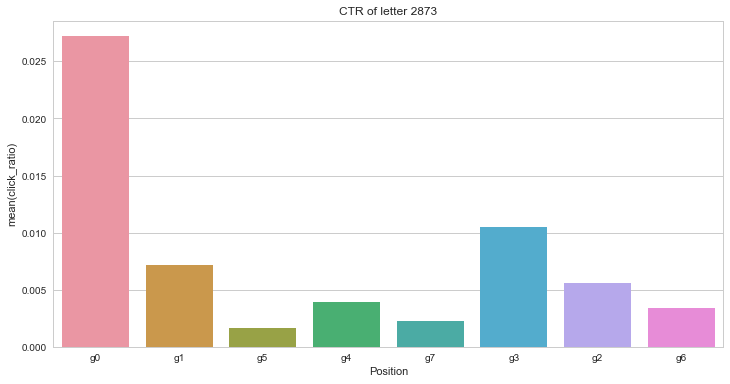

In [166]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Position',y='click_ratio',data=CTR_Date)
plt.title('CTR of letter 2873')
plt.show()
plt.gcf().clear()

For newsletter 2885

In [169]:
nl_2885=data[data.nl_id==2885]
num_user_2885=nl_2885['user_id'].nunique()

In [170]:
nl_2885_clicked=nl_2885[nl_2885.event_type=='nllc']
click_type=list(nl_2885_clicked.event_type_param.unique())

In [171]:
CTR=np.zeros((8))
for index,Cli in enumerate(click_type):
    num_clicks=(nl_2885_clicked[nl_2885_clicked.event_type_param==Cli])['user_id'].nunique()
    ctr=num_clicks/num_user_2885
    CTR[index]+=ctr
CTR_Date=pd.DataFrame({'click_ratio':CTR,'Position':click_type})  

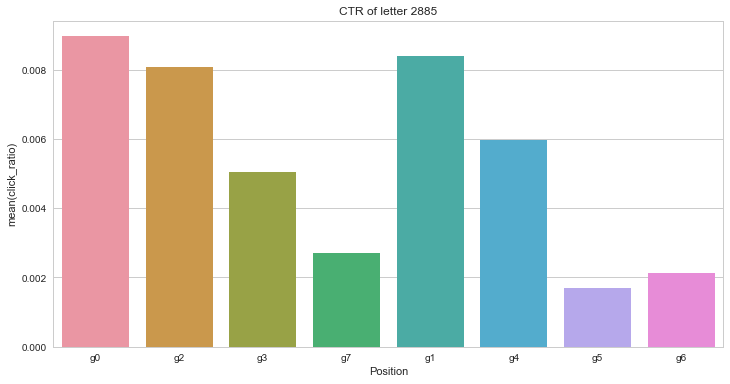

In [172]:
fig=plt.figure(figsize=(12,6))
ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
sns.barplot(x='Position',y='click_ratio',data=CTR_Date)
plt.title('CTR of letter 2885')
plt.show()
plt.gcf().clear()

### Question_4


The first metric of interest can be the difference between $\%$ of users opened the email within first couple of days such as day_1, day_2 or day_3, and $\%$ of users opened the email within later days such as day_6 or day_7.

The intuition behind this metric is a well performed newsletter should have the ability to immediately pique the interest of the target audience, which would result in above described difference being very small. On the other hand, a small difference can also mean an newsletter is very ill-received as targets might not bother opening them not all. Therefore, above metric can be informative about those newsletter which are either very well-received, or very poorly received.


The second metric of interest might be the time a target spent viewing the newsletter, which can be approximately as the interval between target cliked open the newsletter and exited it.

The intuition behind this one is targets should natrually spend more time on the newsletter, if it's well received.